In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **BERT PREPROCESSING FEATURE EXTRACTION**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
le  = LabelEncoder()
# # Load the historical data
data = pd.read_csv("/content/drive/Othercomputers/Advait Laptop/Programming_backed/pythonProject/ML/stock_news_nlp/labels2_merged.csv", index_col=0)
# print(data["Adj Close_positive_change"].value_counts())
data["Sentiment"] = le.fit_transform(data["Sentiment"])
data["Open_positive_change"] = le.fit_transform(data["Open_positive_change"])
data["Volume_positive_change"] = le.fit_transform(data["Volume_positive_change"])
data['Adj Close_positive_change'] = le.fit_transform(data['Adj Close_positive_change'])
# data.columns
data.head(5)

,Open,Adj Close,Volume,Headline,Clean_Headline,Sentiment,Open_positive_change,Adj Close_positive_change,Volume_positive_change
Date,,,,,,,,,
2022-02-23,37995.049942,37365.210213,116398908.0,The new feature-packed Maruti Suzuki Baleno ta...,The new feature-packed Maruti Suzuki Baleno ta...,2,0,0,2
2022-02-24,36602.600037,35400.490860,300864454.0,"Sensex, Nifty crash as Russia declares war on ...",Sensex Nifty crash Russia declares war Ukraine...,2,0,2,0
2022-02-25,36517.450104,36480.285309,201255397.0,CGST officials bust fake input tax credit rack...,CGST official bust fake input tax credit racke...,0,0,2,2
2022-02-26,36516.400040,36652.141289,207094657.0,Future Retail to scale down operations to redu...,Future Retail scale operation reduce loss Reli...,1,0,2,2
2022-02-27,36515.875008,36738.069279,210014287.0,Russia-Ukraine war teaches India to be 'Atmani...,Russia-Ukraine war teach India 'Atmanirbhar Ud...,1,0,2,2


In [ ]:
from tensorflow.keras.utils import to_categorical

X = data[['Open_positive_change', 'Volume_positive_change',"Clean_Headline"]].values
y = data['Adj Close_positive_change'].values
y = to_categorical(y, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_text_data = [row[-1] for row in X_train]

# train_text_data
# test_text_data = [row[-1] for row in X_test]
# test_text_data


In [ ]:
# Load pre-trained BERT model and tokenizer
# bert_model = TFBertModel.from_pretrained('bert-base-uncased')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# # Define the maximum sequence length for input to BERT and LSTM
# max_seq_length = 128
# # Define the input layers for the model
# input_ids = Input(shape=(max_seq_length,), dtype=tf.int32, name='input_ids')
# attention_mask = Input(shape=(max_seq_length,), dtype=tf.int32, name='attention_mask')
# bert_output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})
# bert_output = bert_output.last_hidden_state
# attention_output = tf.keras.layers.GlobalAveragePooling1D()(bert_output)
# attention_output = tf.keras.layers.Dense(256, activation='relu')(attention_output)

In [ ]:

from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:

vol_train = np.array([row[-2] for row in X_train])
open_train = np.array([row[-3] for row in X_train])
vol_test = np.array([row[-2] for row in X_test])
open_test = np.array([row[-3] for row in X_test])

In [ ]:
# Convert the input data into BERT format
train_input_ids = tokenizer([row[-1] for row in X_train], padding=True, truncation=True, max_length=128, return_tensors="tf")["input_ids"]
train_attention_mask = tokenizer([row[-1] for row in X_train], padding=True, truncation=True, max_length=128, return_tensors="tf")["attention_mask"]
test_input_ids = tokenizer([row[-1] for row in X_test], padding=True, truncation=True, max_length=128, return_tensors="tf")["input_ids"]
test_attention_mask = tokenizer([row[-1] for row in X_test], padding=True, truncation=True, max_length=128, return_tensors="tf")["attention_mask"]

In [ ]:
# # MAKE CLASSIFICATION MODEL INSTEAD OF REGRESSION

# import tensorflow as tf
# from tensorflow.keras.layers import Reshape
# from tensorflow.keras.layers import Input, Concatenate, LSTM, Dropout, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# input_ids = Input(shape=(128,), dtype=tf.int32, name="input_ids")
# attention_mask = Input(shape=(128,), dtype=tf.int32, name="attention_mask")
# volume_change = Input(shape=(1,), dtype=tf.float32, name="volume_change")
# open_change = Input(shape=(1,), dtype=tf.float32, name="open_change")

# # Pass inputs through BERT model
# bert_output = bert_model(input_ids, attention_mask=attention_mask)[1]


# # Add LSTM layer using BERT output and other inputs
# lstm_input = Concatenate()([bert_output, volume_change, open_change])
# lstm_input_reshaped = Reshape((-1, lstm_input.shape[1]))(lstm_input)
# lstm_output = LSTM(units=64, activation='tanh')(lstm_input_reshaped)

# # Add dropout layer for regularization
# dropout = Dropout(0.3)(lstm_output)

# # Add a dense layer for regression
# dense = Dense(1, activation="linear")(dropout)

# # Define the model
# model = Model(inputs=[input_ids, attention_mask, volume_change, open_change], outputs=dense)

# # Compile the model with mean squared error loss and Adam optimizer
# model.compile(loss='mean_squared_error', optimizer=Adam(lr=2e-5), metrics=['mse'])

# lstm_output.shape
# model.summary()


In [ ]:
# MAKE CLASSIFICATION MODEL INSTEAD OF REGRESSION

import tensorflow as tf
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input, Concatenate, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_ids = Input(shape=(128,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(128,), dtype=tf.int32, name="attention_mask")
volume_change = Input(shape=(1,), dtype=tf.float32, name="volume_change")
open_change = Input(shape=(1,), dtype=tf.float32, name="open_change")

# Pass inputs through BERT model
bert_output = bert_model(input_ids, attention_mask=attention_mask)[1]


# # Add LSTM layer using BERT output and other inputs
lstm_input = Concatenate()([bert_output, volume_change, open_change])
lstm_input_reshaped = Reshape((-1, lstm_input.shape[1]))(lstm_input)
lstm_output = LSTM(units=64, activation='sigmoid')(lstm_input_reshaped)
# dropout = Dropout(0.3)(lstm_output)
dense = Dense(3, activation="softmax")(lstm_output)

# Define the model
model = Model(inputs=[input_ids, attention_mask, volume_change, open_change], outputs=dense)

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

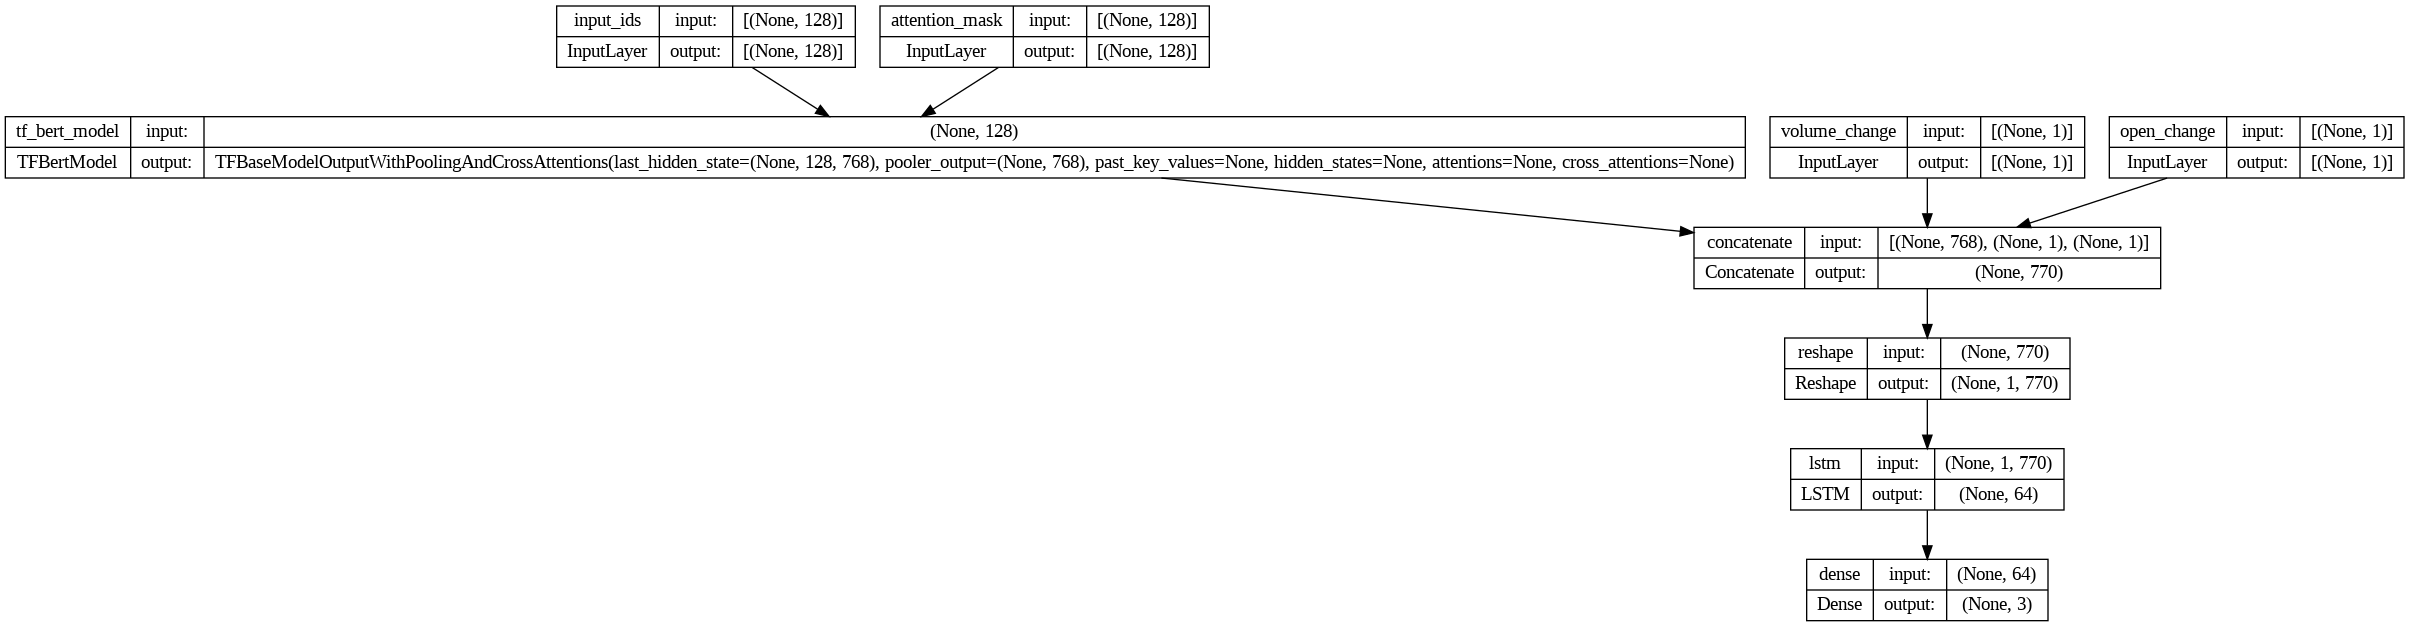

In [ ]:
tf.keras.utils.plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# [train_input_ids, train_attention_mask, vol_train, open_train]
for i in [ test_attention_mask, vol_train, open_test]:
  print(i.shape)

(78, 128)
(309,)
(78,)


In [ ]:
# Train the model
history = model.fit(
    [train_input_ids, train_attention_mask, vol_train, open_train],
    y_train,
    epochs=50,
    batch_size=8,
    validation_data=([test_input_ids, test_attention_mask, vol_test, open_test], y_test)
)


# model.fit([train_bert_features, train_open, train_volume], train_labels, epochs=10, batch_size=32, validation_data=([val_bert_features, val_open, val_volume], val_labels))

# Make predictions on test data

Epoch 1/50
39/39 [==============================] - 69s 509ms/step - loss: 0.8108 - accuracy: 0.5146 - val_loss: 0.7871 - val_accuracy: 0.4872
Epoch 2/50
39/39 [==============================] - 14s 345ms/step - loss: 0.7187 - accuracy: 0.4498 - val_loss: 0.7547 - val_accuracy: 0.4872
Epoch 3/50
39/39 [==============================] - 13s 319ms/step - loss: 0.7067 - accuracy: 0.5146 - val_loss: 0.7565 - val_accuracy: 0.4872
Epoch 4/50
39/39 [==============================] - 12s 320ms/step - loss: 0.7007 - accuracy: 0.4887 - val_loss: 0.7557 - val_accuracy: 0.5000
Epoch 5/50
39/39 [==============================] - 12s 323ms/step - loss: 0.6994 - accuracy: 0.5081 - val_loss: 0.7612 - val_accuracy: 0.4872
Epoch 6/50
39/39 [==============================] - 11s 291ms/step - loss: 0.7008 - accuracy: 0.5146 - val_loss: 0.7595 - val_accuracy: 0.4872
Epoch 7/50
39/39 [==============================] - 11s 290ms/step - loss: 0.6976 - accuracy: 0.4887 - val_loss: 0.7611 - val_accuracy: 0.4872

In [ ]:
test_predictions = model.predict([test_input_ids, test_attention_mask, vol_test, open_test])
test_predictions = model.predict([test_input_ids, test_attention_mask, vol_test, open_test])
# Evaluate the model on test data
# mse, _ = model.evaluate([test_input_ids, test_attention_mask], test_data['label'].values)
# print("Mean Squared Error:", mse)
test_predictions

3/3 [==============================] - 1s 222ms/step


(78, 3)

In [ ]:
      t = test_predictions
t = np.array(t)
np.average(t, axis=0)

array([5.0198805e-01, 2.0024124e-04, 4.9781197e-01], dtype=float32)

In [ ]:
# from transformers import BertTokenizer
# import torch
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def tokenize_text(text):
#     tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=712, truncation=True, padding='max_length')
#     return torch.tensor(tokens['input_ids'])

# # li = data["Clean_Headline"].apply(tokenzing)
# data['input_ids'] = data['Clean_Headline'].apply(lambda x: tokenize_text(x))
# # print(data["input_ids"].head(1))
# for i in data["input_ids"].head(50):
#   print(i)
# # input_ids = tokenizer.convert_tokens_to_ids(tokens)


# **AUTO TRAIN TEXT REGRESSOR**

In [ ]:
!pip install autokeras

In [ ]:
import autokeras
from autokeras import TextRegressor
text_reg = TextRegressor(overwrite=True, max_trials=1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
le  = LabelEncoder()
# Load the historical data
data = pd.read_csv("/content/drive/Othercomputers/Advait Laptop/Programming_backed/pythonProject/ML/stock_news_nlp/labels2_merged.csv", index_col=0)
data["Sentiment"] = le.fit_transform(data["Sentiment"])
data["Open_positive_change"] = le.fit_transform(data["Open_positive_change"])
data["Volume_positive_change"] = le.fit_transform(data["Volume_positive_change"])
data['Adj Close_positive_change'] = le.fit_transform(data['Adj Close_positive_change'])
data.columns

In [ ]:
X = data[['Sentiment', 'Open_positive_change', 'Volume_positive_change']].values
y = data['Adj Close_positive_change'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)